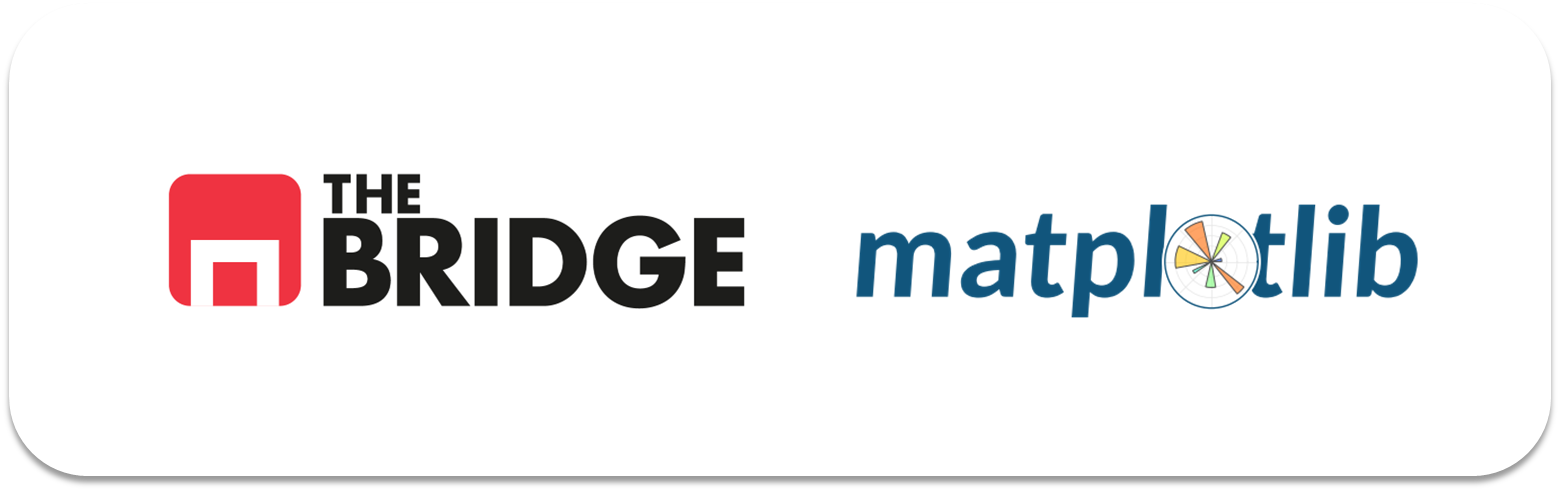

# Visualización con Matplotlib: Algunos elementos de apoyo

En esta sesión vamos a trabajar con las leyendas, los textos añadidos y en cómo marcar con flechas y señalar algunas zonas importantes de nuestras figuras y gráficas. Empecemos importando lo necesario:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Manipulando leyendas


Recordemos como se creaba una leyenda, básicamente añadíamos una etiqueta a las gráficas y luego llamábamos a la función `plt.legend`:

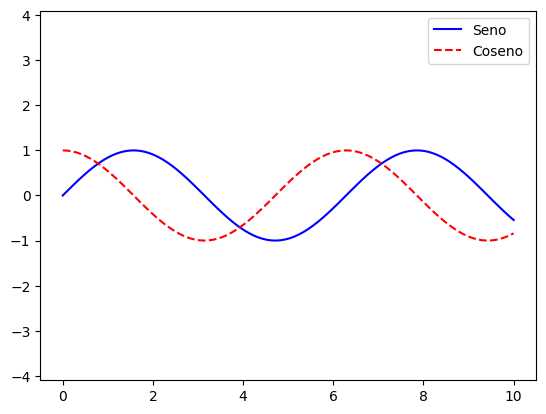

In [2]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '-b', label = 'Seno')
ax.plot(x, np.cos(x), '--r', label = 'Coseno')
ax.axis('equal')
ax.legend();

Y vamos a ver como:
* Ponerle título, con el argumento `title`
* Cambiar la posición de la leyenda, con el argumento `loc`
* Quitar el marco y ponerlo con el argumento `frameon`
* Indicar el núméro de columnas de la leyenda con `ncol`

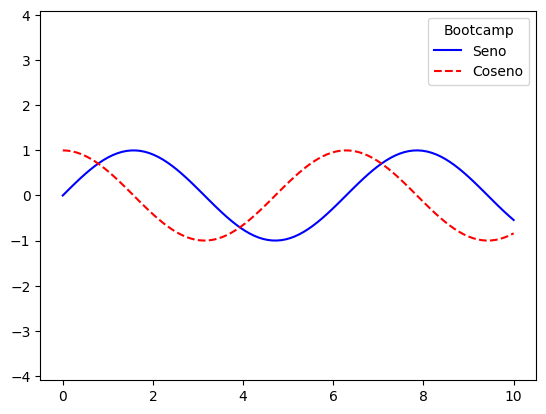

In [3]:
# Título
ax.legend(title = 'Bootcamp')
fig

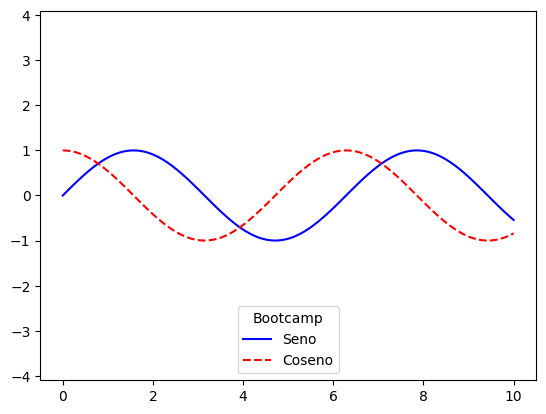

In [4]:
# Centro arriba, abajo izquierda, best
ax.legend(title = 'Bootcamp', loc = 'lower center')
fig

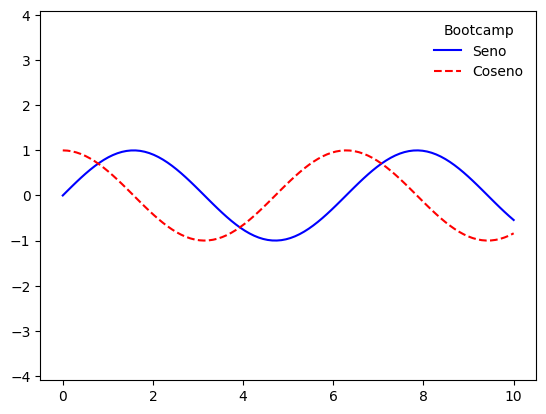

In [5]:
# Sin marco
ax.legend(title = 'Bootcamp', frameon = False)
fig

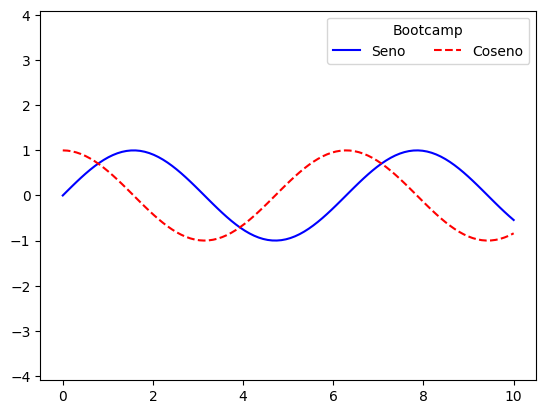

In [6]:
# numero de columnas
ax.legend(title = 'Bootcamp', ncol = 2)
fig

#### Truquitos (I): Leyendas para el tamaño de los puntos [y pequeño repaso]

A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, tal vez estés utilizando el tamaño de los puntos para marcar ciertas características de los datos, y quieras crear una leyenda que refleje esto.  Además también aprenderemos algo sobre la barra de colores o color bar.

Aquí tienes un ejemplo donde usaremos el tamaño de los puntos para indicar las poblaciones de las ciudades de California.
Nos gustaría una leyenda que especifique la escala de los tamaños de los puntos, y lo lograremos trazando algunos datos etiquetados sin entradas:


In [7]:
# Leer dataframe 
df = pd.read_csv('./data/california_cities.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: './data/california_cities.csv'

Practiquemos además un poco con todo lo aprendido en las sesiones anteriores:

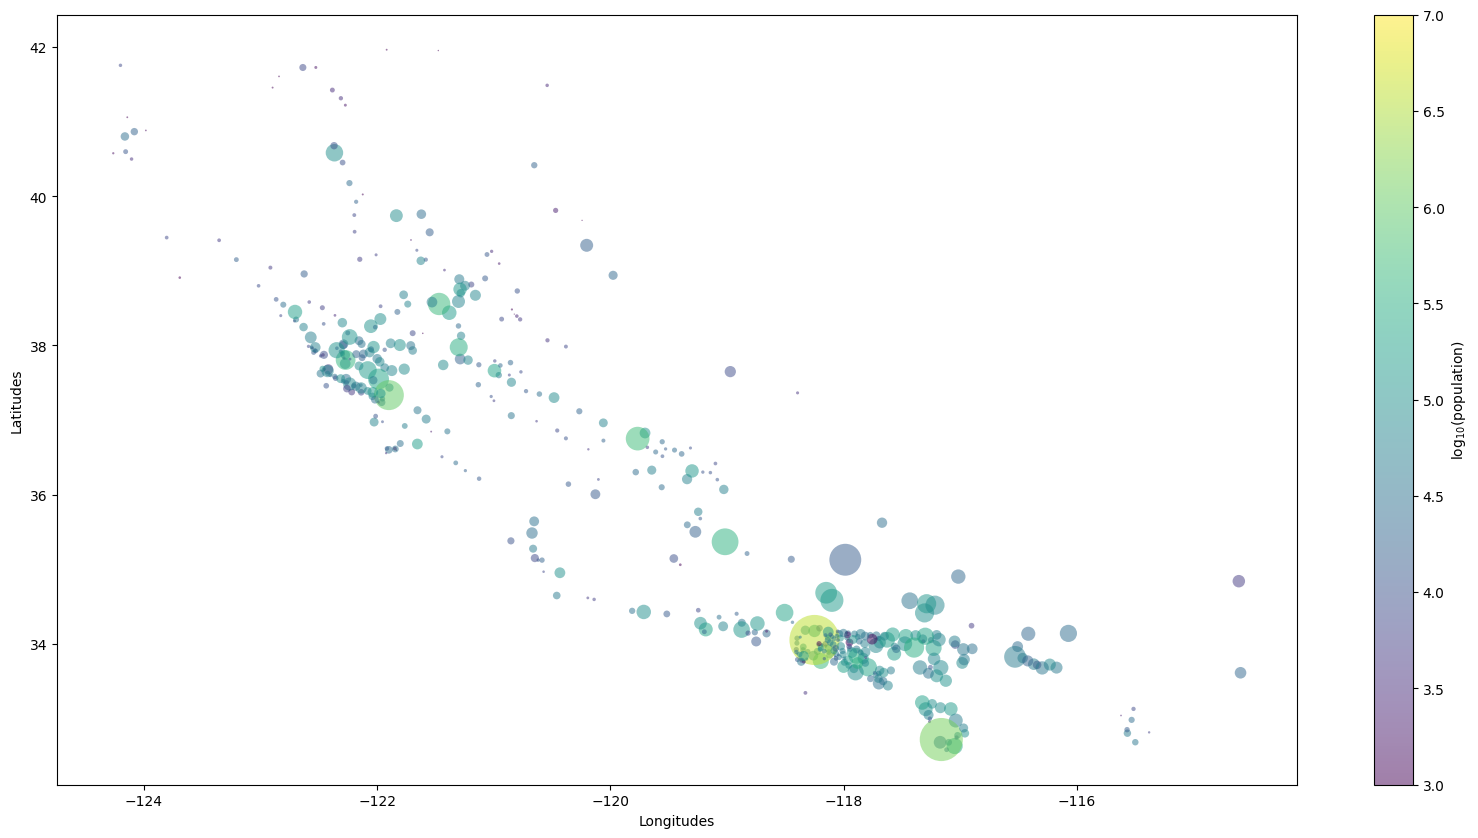

In [ ]:
# Dispersion, barra de colores

lat, lon = df.latd, df.longd
population, area = df.population_total, df.area_total_km2

plt.figure(figsize = (20, 10))
plt.scatter(lon, lat, c = np.log10(population), s = area, cmap = 'viridis', linewidth = 0, alpha = 0.5)

plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.colorbar(label = 'log$_{10}$(population)') # entiende LaTeX
plt.clim(3, 7);

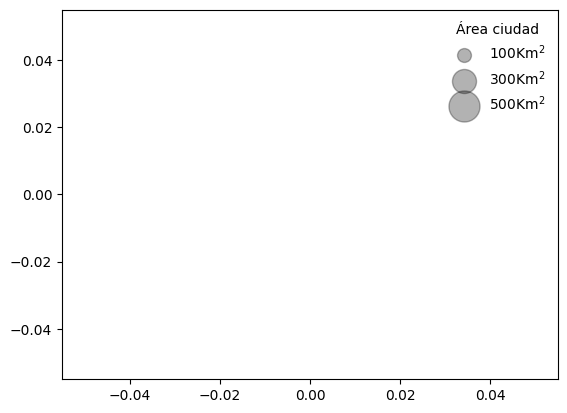

In [ ]:
# Fake legend

for area in [100, 300, 500]:
    plt.scatter([], [], c = 'k', s = area, alpha = 0.3, label = str(area) + 'Km$^2$')
plt.legend(frameon = False, title = 'Área ciudad');

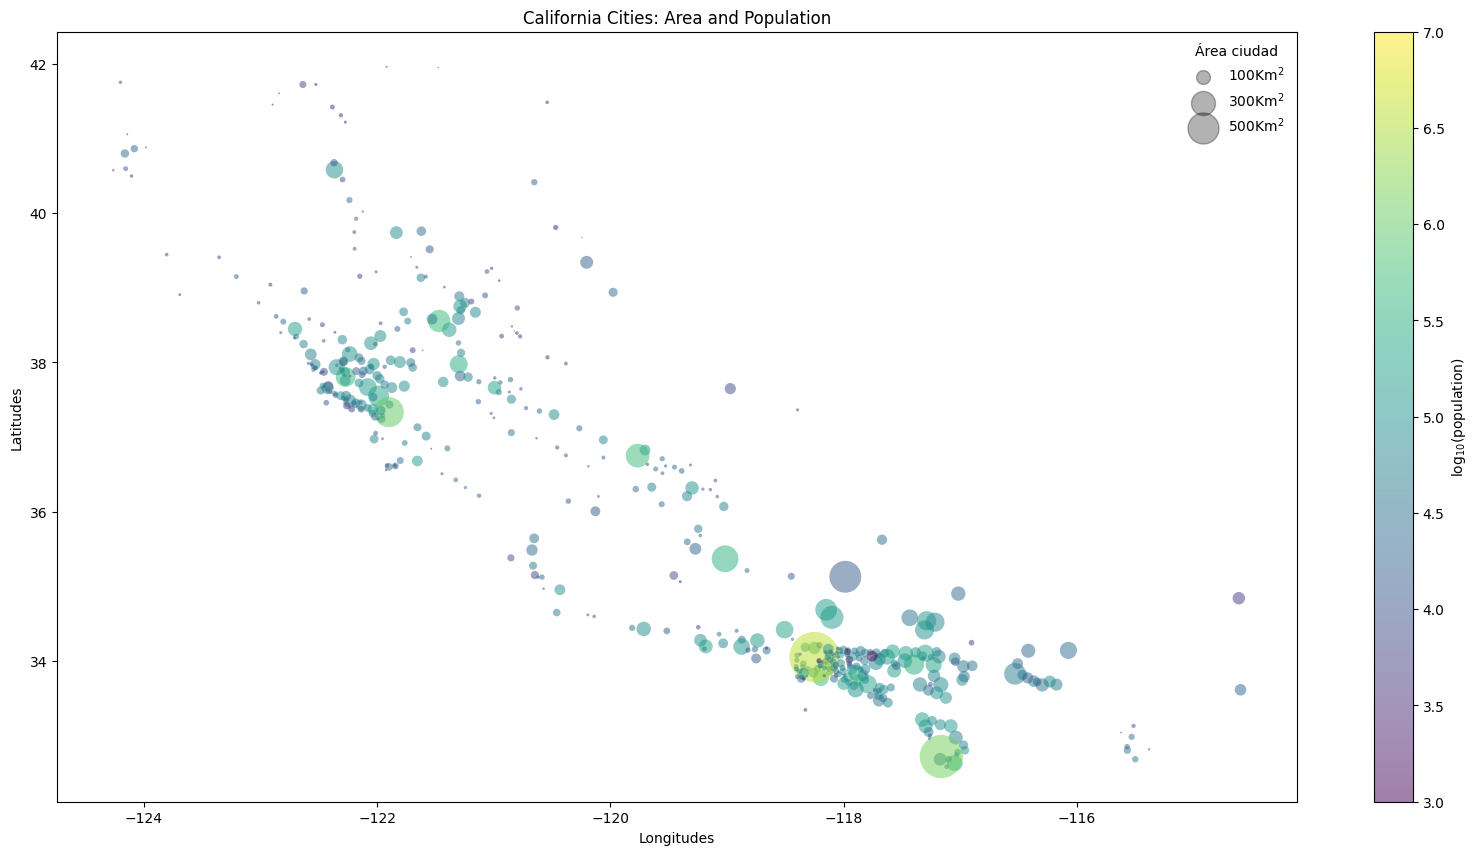

In [ ]:
# Todo junto

lat, lon = df.latd, df.longd
population, area = df.population_total, df.area_total_km2

plt.figure(figsize = (20, 10))
plt.scatter(lon, lat, c = np.log10(population), s = area, cmap = 'viridis', linewidth = 0, alpha = 0.5)

plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.colorbar(label = 'log$_{10}$(population)') # entiende LaTeX
plt.clim(3, 7)

for area in [100, 300, 500]:
    plt.scatter([], [], c = 'k', s = area, alpha = 0.3, label = str(area) + 'Km$^2$')
plt.legend(frameon = False, title = 'Área ciudad')

plt.title('California Cities: Area and Population');

### Textos, anotaciones y flechas

#### Texto

Ya lo vimos, de pasada, al hablar de subplots y marcar estos. Es sencillo:

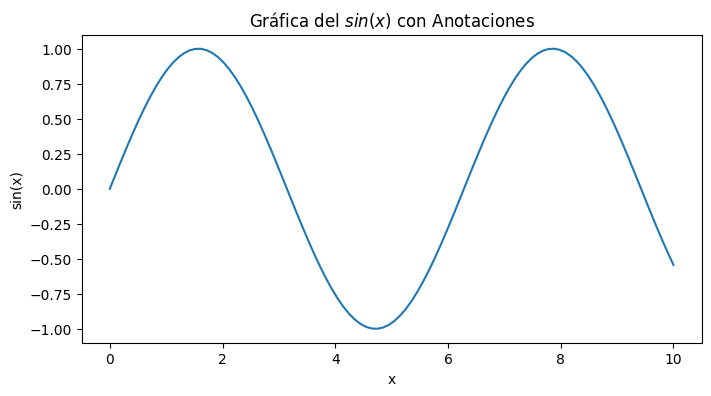

In [ ]:
# Generamos una gráfica simple

x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index = x).idxmin()
min_y_value = pd.Series(y, index = x).min()

plt.figure(figsize = (8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)");

findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.
findfont: Font family 'Brush Script MT' not found.


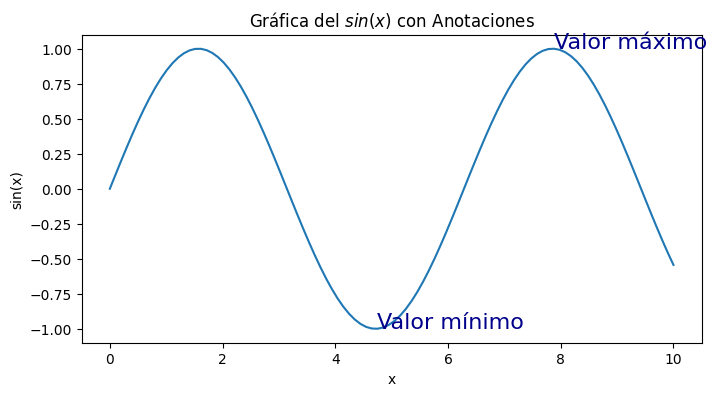

In [ ]:
# Añadir texto en la gráfica

x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index = x).idxmin()
max_x_value = pd.Series(y, index = x).idxmax()
min_y_value = pd.Series(y, index = x).min()
max_y_value = pd.Series(y, index = x).max()

plt.figure(figsize = (8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)")

font_dict = {
    'size': 16,
    'family': 'Brush Script MT',
    'color': 'darkblue'
}
plt.text(min_x_value, min_y_value, 'Valor mínimo', fontdict = font_dict);
plt.text(max_x_value, max_y_value, 'Valor máximo', fontdict = font_dict);

[Aquí](https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) puedes encontrar una lista de fuentes disponibles en Matplotlib (aunque puede que no te fucionen todas). 

Y ahora veamos otra forma de añadir texto con flechas de diversa forma para poder marcar y anotar nuestras gráficas.

#### Flechas y anotaciones

Veamos como añadir una anotación no necesariamente donde se produce y marcar ese punto con una flecha:

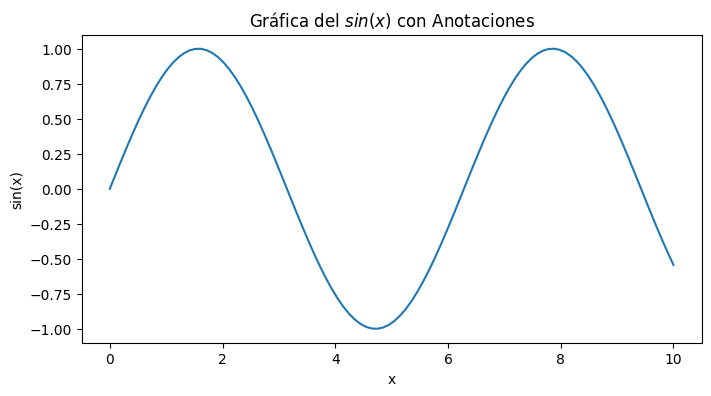

In [ ]:
# Repetir la gráfica simple

x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index = x).idxmin()
min_y_value = pd.Series(y, index = x).min()

plt.figure(figsize = (8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)");

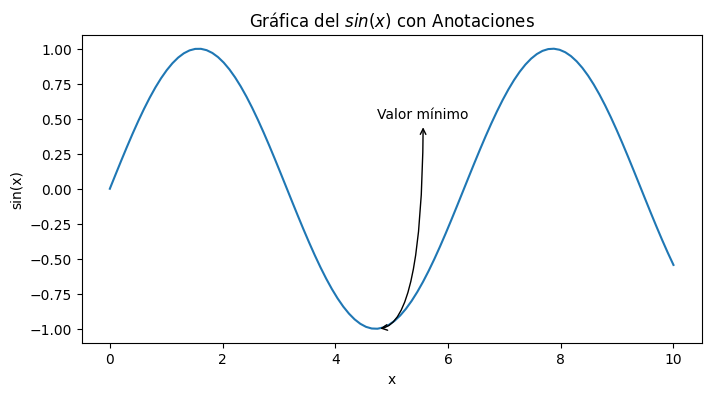

In [ ]:
# Añadir antoación con flecha indicativa


x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index = x).idxmin()
min_y_value = pd.Series(y, index = x).min()

plt.figure(figsize = (8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)")

props_flecha = {
    'arrowstyle': '<->',
    'connectionstyle': 'angle3'
}
plt.annotate('Valor mínimo', xy = (min_x_value, min_y_value), xytext = (min_x_value, 0.5), \
            arrowprops = props_flecha);